<a href="https://colab.research.google.com/github/gopigit25/MachineLearning/blob/main/KNN_(K_Nearest_Neighbors)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.data

In [73]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris_df['target']=iris.target
iris_df.nunique()

In [29]:
len(iris_df[iris_df.target==0])

50

In [28]:
len(iris_df[iris_df.target==1])

50

In [26]:
len(iris_df[iris_df.target==2])

50

In [ ]:
iris_df['flower_name']=iris_df.target.apply(lambda x: iris.target_names[x])
iris_df.head()

In [ ]:
iris_df[45:55]

In [37]:
iris_df0 = iris_df[:50]
iris_df1 = iris_df[50:100]
iris_df2 = iris_df[100:]

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

#Sepal length vs Sepal Width (Setosa vs Versicolor)

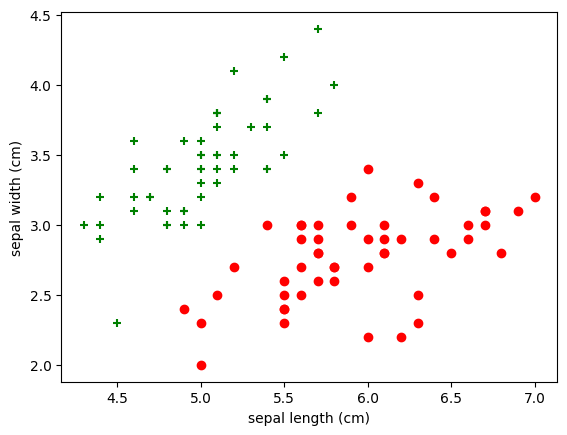

In [48]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(iris_df0['sepal length (cm)'],iris_df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(iris_df1['sepal length (cm)'],iris_df1['sepal width (cm)'],color='red',marker='o')
plt.show()

#Petal length vs Pepal Width (Setosa vs Versicolor)

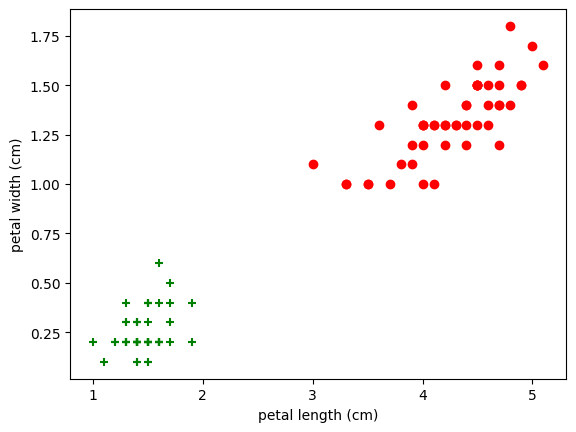

In [50]:
import seaborn as sns
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(iris_df0['petal length (cm)'],iris_df0['petal width (cm)'],color='green',marker='+')
plt.scatter(iris_df1['petal length (cm)'],iris_df1['petal width (cm)'],color='red',marker='o')
plt.show()

# Train test split

In [51]:
from sklearn.model_selection import train_test_split

In [61]:
X = iris_df.drop(['target','flower_name'], axis='columns')
y = iris_df.target
print(X,y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4   

In [65]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
91                 6.1               3.0                4.6               1.4
135                7.7               3.0                6.1               2.3
69                 5.6               2.5                3.9               1.1
128                6.4               2.8                5.6               2.1
114                5.8               2.8                5.1               2.4
..                 ...               ...                ...               ...
133                6.3               2.8                5.1               1.5
137                6.4               3.1                5.5               1.8
72                 6.3               2.5                4.9               1.5
140                6.7               3.1                5.6               2.4
37                 4.9               3.6                1.4               0.1

[120 rows x 4 columns]


In [54]:
len(X_train)

120

In [55]:
len(X_test)

30

#Create KNN (K Neighrest Neighbour Classifier)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)

In [58]:
knn.score(X_test,y_test)

0.9666666666666667

In [72]:
Y_Test = knn.predict(X_test)
print("Original_Values",y_test.values.ravel())
print("Predicted_Results",Y_Test)

Original_Values [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
Predicted_Results [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


#Plot Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

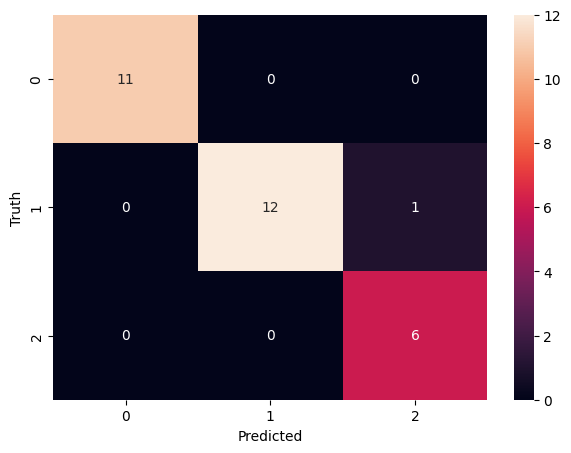

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

